In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from statistics import median
from statistics import mean
import cv2
from numpy import bitwise_xor

In [17]:
loc = []
img = []
for i in range(4):
    loc.append('C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P5/I/young_trump_{}.jpg'.format(i+1))
    img.append(np.array(Image.open(loc[i])))


# Graysclae conversion:

In [52]:
gray_img = []
for i in img:  
    gray_img.append(i[:,:,0]*0.299 + i[:,:,1]*0.587 + i[:,:,2]*0.114)

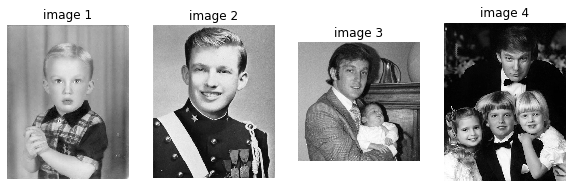

In [44]:
for i in range(4):
    matplotlib.rcParams['figure.figsize'] = [10,10]
    plt.subplot(1,4,i+1)
    plt.imshow(gray_img[i],'gray')
    plt.title('image {}'.format(i+1))
    plt.axis('off')
#plt.suptitle('Grayscale conversion')

# Finding image negative: 

In [54]:
negative = []
for i in gray_img:
    negative.append(255-i)

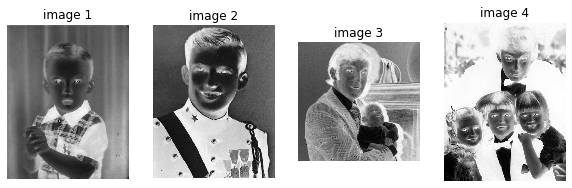

In [57]:
for i in range(4):
    matplotlib.rcParams['figure.figsize'] = [10,10]
    plt.subplot(1,4,i+1)
    plt.imshow(negative[i],'gray')
    plt.title('image {}'.format(i+1))
    plt.axis('off')

# Blurring the image:

In [66]:
def filter(image,filter_size):
    filtered_image = np.zeros(list(image.shape))
    x,y = image.shape
    for i in range(x):
        for j in range(y):
            filtered_image[i,j] = pix_med_filter([i,j], image, filter_size)
    fil_size = filter_size
    return filtered_image

def pix_med_filter(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = mean(neigh_pixs)
    return out_pixel

In [89]:
blurr = []
for i in negative:
    blurr.append(filter(i,9))

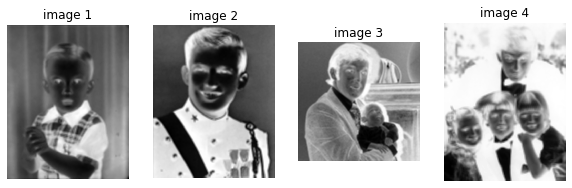

In [90]:
for i in range(4):
    matplotlib.rcParams['figure.figsize'] = [10,10]
    plt.subplot(1,4,i+1)
    plt.imshow(blurr[i],'gray')
    plt.title('image {}'.format(i+1))
    plt.axis('off')

# Color dodging: 

In [183]:
result = []
for i in range(4):
    result.append(blurr[i]*(255/(255-gray_img[i])))


In [184]:
for res in result:
    i,j = res.shape
    for x in range(i):
        for y in range(j):
            if res[x,y]>= 255:
                res[x,y] = 255

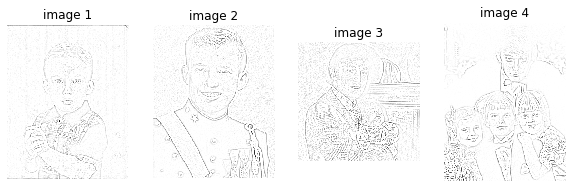

In [185]:
for i in range(4):
    matplotlib.rcParams['figure.figsize'] = [10,10]
    plt.subplot(1,4,i+1)
    plt.imshow(result[i],'gray')
    plt.title('image {}'.format(i+1))
    plt.axis('off')

# Smoothing kernel size:

In [204]:
def filter(image,filter_size):
    filtered_image = np.zeros(list(image.shape))
    x,y = image.shape
    for i in range(x):
        for j in range(y):
            filtered_image[i,j] = pix_med_filter([i,j], image, filter_size)
    fil_size = filter_size
    return filtered_image

def pix_med_filter(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = median(neigh_pixs)
    return out_pixel

In [210]:
smoothed = []
for res in result:
    smoothed.append(filter(res,3))

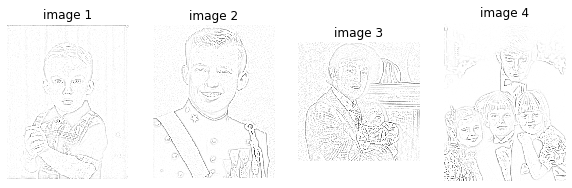

In [211]:
for i in range(4):
    matplotlib.rcParams['figure.figsize'] = [10,10]
    plt.subplot(1,4,i+1)
    plt.imshow(smoothed[i],'gray')
    plt.title('image {}'.format(i+1))
    plt.axis('off')